In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [3]:
df1 = pd.read_csv('EPAM.csv')
df1.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-11-13,102.510002,100.120003,101.889999,102.370003,274300,102.370003
1,2017-11-14,103.070000,101.510002,101.800003,102.610001,178200,102.610001
2,2017-11-15,103.389999,100.879997,102.709999,102.629997,246600,102.629997
3,2017-11-16,104.320000,103.160004,103.230003,103.610001,211100,103.610001
4,2017-11-17,104.209999,102.489998,103.160004,103.699997,183400,103.699997


In [13]:
df2 = pd.read_csv('HON.csv')
df3 = pd.read_csv('JCI.csv')
df4 = pd.read_csv('SCHW.csv')
df1['company'] = 'EPAM'
df2['company'] = 'HON'
df3['company'] = 'JCI'
df4['company'] = 'SCHW'


1259

# concatenating


In [14]:
df = pd.concat([df1, df2, df3, df4], axis = 0)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,company
0,2017-11-13,102.510002,100.120003,101.889999,102.370003,274300.0,102.370003,EPAM
1,2017-11-14,103.070000,101.510002,101.800003,102.610001,178200.0,102.610001,EPAM
2,2017-11-15,103.389999,100.879997,102.709999,102.629997,246600.0,102.629997,EPAM
3,2017-11-16,104.320000,103.160004,103.230003,103.610001,211100.0,103.610001,EPAM
4,2017-11-17,104.209999,102.489998,103.160004,103.699997,183400.0,103.699997,EPAM


# 1)

In [21]:
ser = df[(df['Close']-df['Adj Close']) == 0].company
ser.value_counts()


EPAM    1259
JCI      228
HON      182
SCHW       3
Name: company, dtype: int64

In [22]:
len(df1['company'])

1259

## len(df1['company']) is equal to the number this company appears in value counts, thus company with ticker EPAM has their closing prices equal to true prices. It means that true value of a stock is reflected in closing price


# 2)

In [25]:

df[df['company'] == 'EPAM']['Adj Close'].max()

717.489990234375

In [34]:
df[df['company'] == 'HON']['Adj Close'].max()

231.4597625732422

In [33]:
df[df['company'] == 'JCI']['Adj Close'].max()


81.30999755859375

In [32]:
df[df['company'] == 'SCHW']['Adj Close'].max()


94.47440338134766

# 3)

In [30]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,company
0,2017-11-13,102.510002,100.120003,101.889999,102.370003,274300.0,102.370003,EPAM
1,2017-11-14,103.070000,101.510002,101.800003,102.610001,178200.0,102.610001,EPAM
2,2017-11-15,103.389999,100.879997,102.709999,102.629997,246600.0,102.629997,EPAM
3,2017-11-16,104.320000,103.160004,103.230003,103.610001,211100.0,103.610001,EPAM
4,2017-11-17,104.209999,102.489998,103.160004,103.699997,183400.0,103.699997,EPAM


In [45]:
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)

df['gain%'] = (df['Close'] - df['Open'])/df['Open']
df['log_return'] = np.log(df['gain%'] + 1)
df['return'] = df['Close'] - df['Open']

df.head()


,Date,High,Low,Open,Close,Volume,Adj Close,company,log_return,gain%,return
0,2017-11-13,102.510002,100.120003,101.889999,102.370003,274300.0,102.370003,EPAM,0.004700,0.004711,0.480003
1,2017-11-14,103.070000,101.510002,101.800003,102.610001,178200.0,102.610001,EPAM,0.007925,0.007957,0.809998
2,2017-11-15,103.389999,100.879997,102.709999,102.629997,246600.0,102.629997,EPAM,-0.000779,-0.000779,-0.080002
3,2017-11-16,104.320000,103.160004,103.230003,103.610001,211100.0,103.610001,EPAM,0.003674,0.003681,0.379997
4,2017-11-17,104.209999,102.489998,103.160004,103.699997,183400.0,103.699997,EPAM,0.005221,0.005235,0.539993


# 4)

In [63]:
df_EPAM = df[df['company'] == 'EPAM']
max_EPAM = df_EPAM[df_EPAM['log_return'] == df_EPAM['log_return'].max()][['Date']]
min_EPAM = df_EPAM[df_EPAM['log_return'] == df_EPAM['log_return'].min()][['Date']]
print(max_EPAM, min_EPAM)

            Date
1091  2022-03-16             Date
1079  2022-02-28


In [64]:
df_HON = df[df['company'] == 'HON']
max_HON = df_HON[df_HON['log_return'] == df_HON['log_return'].max()][['Date']]
min_HON = df_HON[df_HON['log_return'] == df_HON['log_return'].min()][['Date']]
print(max_HON, min_HON)

           Date
592  2020-03-24            Date
590  2020-03-20


In [67]:
df_JCI =  df[df['company'] == 'JCI']
max_JCI = df_JCI[df_JCI['log_return'] == df_JCI['log_return'].max()][['Date']]
min_JCI = df_JCI[df_JCI['log_return'] == df_JCI['log_return'].min()][['Date']]
print(max_JCI, min_JCI)

           Date
586  2020-03-16            Date
590  2020-03-20


In [72]:
df_SCHW = df[df['company'] == 'SCHW']
max_SCHW = df_SCHW[df_SCHW['log_return'] == df_SCHW['log_return'].max()][['Date']]
min_SCHW = df_SCHW[df_SCHW['log_return'] == df_SCHW['log_return'].max()][['Date']]
print(max_SCHW, min_SCHW)

           Date
585  2020-03-13            Date
585  2020-03-13


In [73]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,company,log_return,gain%,return
0,2017-11-13,102.510002,100.120003,101.889999,102.370003,274300.0,102.370003,EPAM,0.004700,0.004711,0.480003
1,2017-11-14,103.070000,101.510002,101.800003,102.610001,178200.0,102.610001,EPAM,0.007925,0.007957,0.809998
2,2017-11-15,103.389999,100.879997,102.709999,102.629997,246600.0,102.629997,EPAM,-0.000779,-0.000779,-0.080002
3,2017-11-16,104.320000,103.160004,103.230003,103.610001,211100.0,103.610001,EPAM,0.003674,0.003681,0.379997
4,2017-11-17,104.209999,102.489998,103.160004,103.699997,183400.0,103.699997,EPAM,0.005221,0.005235,0.539993


# 5) 


# 6)

In [82]:
epam = df_EPAM['return'].sum()
hon = df_HON['return'].sum()
jci = df_JCI['return'].sum()
schw = df_SCHW['return'].sum()
print(epam, hon, jci, schw)
#SOOO, JCI IT IS -- 15.54991340637197

-21.759269714355852 -27.634315490723836 15.54991340637197 3.2899284362792187


# 7) 

<AxesSubplot:>

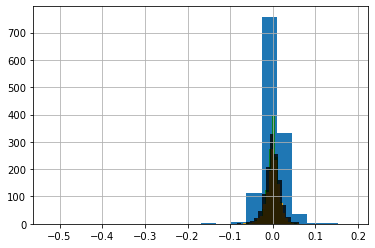

In [97]:
df_EPAM['log_return'].hist(bins = 20)
df_HON['log_return'].hist(bins = 20, alpha = 0.8, color = 'green')
df_JCI['log_return'].hist(bins = 20, alpha = 0.8, color = 'orange')
df_SCHW['log_return'].hist(bins = 20, alpha = 0.8, color = 'black')


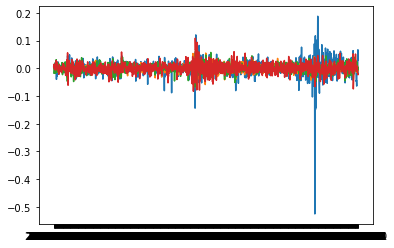

<Figure size 1440x1440 with 0 Axes>

In [90]:
#or is this one better? i think no

plt.plot(df_EPAM['Date'], df_EPAM['log_return'])
plt.plot(df_HON['Date'], df_HON['log_return'])
plt.plot(df_JCI['Date'], df_JCI['log_return'])
plt.plot(df_SCHW['Date'], df_SCHW['log_return'])
fig = plt.figure(figsize = (20, 20))
plt.show()
